### Demonstrate the use of convolutional neural networks for predicting object category in an image.

In [9]:
# split the original dataset into training, validation, and testing subsets

import os
import shutil

filenames = [f'{i}.jpg' for i in range(1000)]
for filename in filenames:
    src = os.path.join('data', 'dogs_cats', 'base', 'cats', filename)
    dst = os.path.join('data', 'dogs_cats', 'train_cats', filename)
    shutil.copyfile(src, dst)

filenames = [f'{i}.jpg' for i in range(1000, 1500)]
for filename in filenames:
    src = os.path.join('data', 'dogs_cats', 'base', 'cats', filename)
    dst = os.path.join('data', 'dogs_cats', 'validation_cats', filename)
    shutil.copyfile(src, dst)

filenames = [f'{i}.jpg' for i in range(1500, 2000)]
for filename in filenames:
    src = os.path.join('data', 'dogs_cats', 'base', 'cats', filename)
    dst = os.path.join('data', 'dogs_cats', 'test_cats', filename)
    shutil.copyfile(src, dst)

filenames = [f'{i}.jpg' for i in range(1000)]
for filename in filenames:
    src = os.path.join('data', 'dogs_cats', 'base', 'dogs', filename)
    dst = os.path.join('data', 'dogs_cats', 'train_dogs', filename)
    shutil.copyfile(src, dst)

filenames = [f'{i}.jpg' for i in range(1000, 1500)]
for filename in filenames:
    src = os.path.join('data', 'dogs_cats', 'base', 'dogs', filename)
    dst = os.path.join('data', 'dogs_cats', 'validation_dogs', filename)
    shutil.copyfile(src, dst)

filenames = [f'{i}.jpg' for i in range(1500, 2000)]
for filename in filenames:
    src = os.path.join('data', 'dogs_cats', 'base', 'dogs', filename)
    dst = os.path.join('data', 'dogs_cats', 'test_dogs', filename)
    shutil.copyfile(src, dst)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - accuracy: 0.5154 - loss: 0.6970 - val_accuracy: 0.5630 - val_loss: 0.6828
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.6260 - loss: 0.6710 - val_accuracy: 0.5840 - val_loss: 0.6590
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.6574 - loss: 0.6253 - val_accuracy: 0.6490 - val_loss: 0.6260
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.6770 - loss: 0.5961 - val_accuracy: 0.6470 - val_loss: 0.6199
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 165us/step - accura

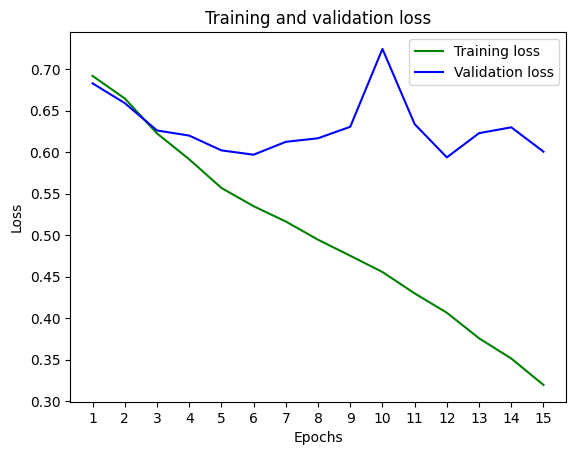

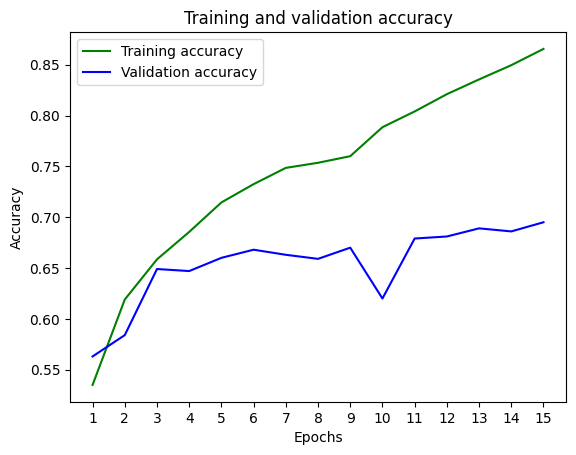

In [30]:
import os
import matplotlib.pyplot as plt
from keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

%matplotlib inline

train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    os.path.join('data', 'dogs_cats', 'train'),
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = valid_datagen.flow_from_directory(
    os.path.join('data', 'dogs_cats', 'validation'),
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join('data', 'dogs_cats', 'test'),
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# initilaize new CNN model
# for image classifcation
model = models.Sequential()
model.add(layers.Input(shape=(150, 150, 3))) # RGB images, hence 3 channels
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # recognizes small local patterns
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # recognizes larger patterns from prev layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # recognizes larger patterns from prev layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # recognizes larger patterns from prev layer

# dense layers work with 1D tensors so
# flatten the output of the last layer
model.add(layers.Flatten())

# now adding dense layers for classification
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # only 2 categories

# compile the model 
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']    
)

# start training the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

# evaluate the model in terms of accuracy and loss
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Test loss:', round(test_loss, 4), 'Test accuracy:', round(test_acc, 4))

history_loss = history.history['loss'][::2]
history_val_loss = history.history['val_loss']
epochs=range(1, len(history_loss) + 1)

plt.plot(epochs, history_loss, 'g', label='Training loss')
plt.plot(epochs, history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.show()

# clear prev plot
plt.clf()

history_accuracy = history.history['accuracy'][::2]
history_val_accuracy = history.history['val_accuracy']

plt.plot(epochs, history_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, history_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()

The above graphs indicate overfitting. This is due to a limited sample number the model was trained on (2000). To deal with this unwanted situation, data augmentation may help.

In [35]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    
  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.0

  prediction = model.predict(img_tensor)
  if prediction[0] > 0.5:
    print(f"The image is predicted to be a dog with a probability of {prediction[0][0]:.4f}")
  else:
    print(f"The image is predicted to be a cat with a probability of {1 - prediction[0][0]:.4f}")

predict_image(r'E:\data_analytics\data\dogs_cats\base\cats\18.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The image at E:\data_analytics\data\dogs_cats\base\cats\18.jpg is predicted to be a cat with a probability of 0.7918


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 264ms/step - accuracy: 0.5004 - loss: 0.7042 - val_accuracy: 0.5540 - val_loss: 0.6906
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 226ms/step - accuracy: 0.5329 - loss: 0.6911 - val_accuracy: 0.5450 - val_loss: 0.6846
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - accuracy: 0.5529 - loss: 0.6816 - val_accuracy: 0.5350 - val_loss: 0.6829
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 167us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 220ms/step - accuracy: 0.5603 - loss: 0.6731 - val_accuracy: 0.6170 - val_loss: 0.6428
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step 

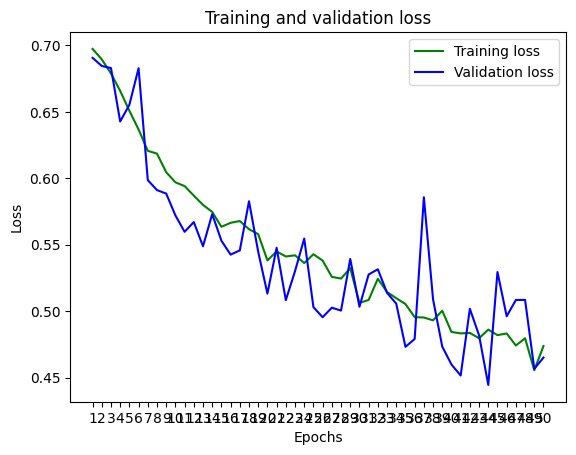

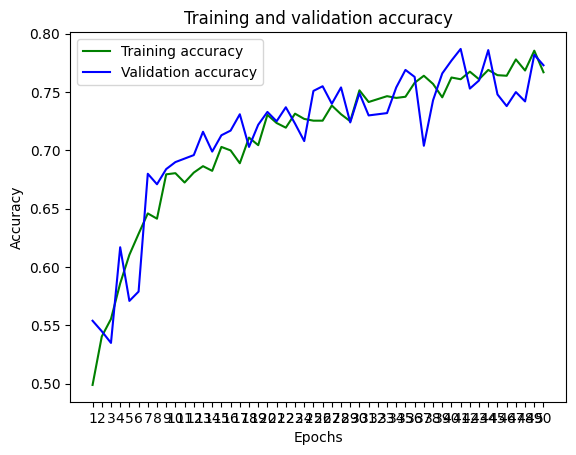

In [2]:
import os
import matplotlib.pyplot as plt
from keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

%matplotlib inline

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# validation data should not be augmented - logically
valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    os.path.join('data', 'dogs_cats', 'train'),
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary' # using binary_crossentropy
)

validation_generator = valid_datagen.flow_from_directory(
    os.path.join('data', 'dogs_cats', 'validation'),
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary' # using binary_crossentropy
)

test_generator = test_datagen.flow_from_directory(
    os.path.join('data', 'dogs_cats', 'test'),
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary' # using binary_crossentropy
)

# initilaize new CNN model
# for image classifcation
model = models.Sequential()
model.add(layers.Input(shape=(150, 150, 3))) # RGB images, hence 3 channels
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # recognizes small local patterns
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # recognizes larger patterns from prev layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # recognizes larger patterns from prev layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # recognizes larger patterns from prev layer

# Randomly set 50% of input units to zero during training to help
# the model learn more robust features and improve generalization.
model.add(layers.Dropout(0.5))

# dense layers work with 1D tensors so
# flatten the output of the last layer
model.add(layers.Flatten())

# now adding dense layers for classification
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # only 2 categories

# compile the model 
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']    
)

# start training the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

# evaluate the model in terms of accuracy and loss
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Test loss:', round(test_loss, 4), 'Test accuracy:', round(test_acc, 4))

history_loss = history.history['loss'][::2]
history_val_loss = history.history['val_loss']
epochs=range(1, len(history_loss) + 1)

plt.plot(epochs, history_loss, 'g', label='Training loss')
plt.plot(epochs, history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.show()

# clear prev plot
plt.clf()

history_accuracy = history.history['accuracy'][::2]
history_val_accuracy = history.history['val_accuracy']

plt.plot(epochs, history_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, history_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()

The accuracy has improved and the model does not suffer form overfitting anymore. 

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0
